# Description

本ディレクトリでは，機械学習自動化に関連するモジュールの動作確認用のサンプルを紹介する．  
使用するデータセットはscikit-learnでトイデータとしてダウンロード可能な[ボストン住宅価格予測用データセット](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)を使用する．

機械学習ライブラリは，[scikit-learn](https://scikit-learn.org/stable/)，[TensorFlow](https://www.tensorflow.org/?hl=ja)，[PyTorch](https://pytorch.org/)を使用する．

## 予測精度の目標

機械学習関連モジュールの試行が主目的ではあるが，住宅価格の予測精度の基準は，公開情報をもとに設定しておく．

### 例1：[機械学習（回帰モデル）をscikit-learnを用いて様々な手法を実装してみた](https://qiita.com/DS27/items/aa3f6d0f03a8053e5810)

|Method|決定係数(R2)|平均絶対誤差(MAE)|
|:--|:--|:--|
|線形回帰|0.779|3.113|
|Ridge回帰|0.780|3.093|
|Lasso回帰|0.782|3.071|
|ElasticNet回帰|0.781|3.080|
|RandomForest回帰|0.899|2.122|
|GBDT|0.905|2.097|
|SVR|0.780|2.904|

### 例2：[ボストン市の住宅価格をScikit-learnの線形回帰で予測](https://techtech-sorae.com/%E3%83%9C%E3%82%B9%E3%83%88%E3%83%B3%E5%B8%82%E3%81%AE%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%82%92scikit-learn%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%A7%E4%BA%88%E6%B8%AC/)

|Method|決定係数(R2)|平均二乗誤差(MSE)|
|:--|:--|:--|
|線形回帰|0.435|47.0|

## ボストン住宅価格推定モデルサマリー

|モデル|決定係数(R2)|平均二乗誤差(MSE)|備考|
|---|---|---|---|
|ベースライン|0.435|47.0|[ボストン市の住宅価格をScikit-learnの線形回帰で予測](https://techtech-sorae.com/%E3%83%9C%E3%82%B9%E3%83%88%E3%83%B3%E5%B8%82%E3%81%AE%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%82%92scikit-learn%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%A7%E4%BA%88%E6%B8%AC/)|
|Light GBM|0.79|17.4|[雑にLightGBMで回帰モデルを作ってみる](#雑にLightGBMで回帰モデルを作ってみる)|
|auto-sklearn|0.78|18.1|[auto-sklearn](./auto-sklearn/StructuredDataRegressor.ipynb)|
|AutoKeras|0.81|15.8|[AutoKeras](./AutoKeras/StructuredDataRegressor.ipynb)|
|Optuna|0.86|11.4|[Optuna](./Optuna/Optuna.ipynb)|
|PyCaret|0.84|13.3|[PyCaret](./PyCaret/PyCaret.ipynb)|

## データセット

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
df_x_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df_x_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
df_y_boston = pd.DataFrame(boston['target'], columns=['MEDV'])
df_y_boston

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [4]:
df_boston = pd.concat([df_x_boston, df_y_boston], axis=1)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 認識デバイスの確認

### TensorFlow

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16373580108561358501
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5861978112
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7862720357856759653
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

### PyTorch

In [6]:
import torch
print(torch.cuda.get_device_name())

NVIDIA GeForce RTX 2070 SUPER


## 線形回帰モデルの確認

[ボストン市の住宅価格をScikit-learnの線形回帰で予測](https://techtech-sorae.com/%E3%83%9C%E3%82%B9%E3%83%88%E3%83%B3%E5%B8%82%E3%81%AE%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%82%92scikit-learn%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%A7%E4%BA%88%E6%B8%AC/)の再現確認

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [8]:
train_x, test_x, train_y, test_y = train_test_split(df_x_boston['RM'], df_y_boston, test_size=0.3, random_state=0)

In [9]:
model = LinearRegression()

In [10]:
if (len(train_x.shape) == 1):
    train_x = np.array(train_x).reshape(-1, 1)
if (len(test_x.shape) == 1):
    test_x = np.array(test_x).reshape(-1, 1)

In [11]:
model.fit(train_x, train_y)

LinearRegression()

In [12]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

train_mae = mean_squared_error(train_y, train_pred)
test_mae = mean_squared_error(test_y, test_pred)
print(f'MSE train data: {train_mae:.3f}')
print(f'MSE test data: {test_mae:.3f}')

MSE train data: 42.158
MSE test data: 47.033


In [13]:
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y, test_pred)
print(f'R2 train data: {train_r2:.3f}')
print(f'R2 test data: {test_r2:.3f}')

R2 train data: 0.503
R2 test data: 0.435


## 雑にLightGBMで回帰モデルを作ってみる

In [14]:
import lightgbm as lgb
import matplotlib.pyplot as plt

In [15]:
train_x, test_x, train_y, test_y = train_test_split(df_x_boston, df_y_boston, test_size=0.3, random_state=0)

In [16]:
SEED = 0

params = {
    'objective': 'regression',
    'metric': 'mae',
    'num_leaves': 32,
    'max_depth': 4,
    "feature_fraction": 0.5,
    'subsample_freq': 1,
    "bagging_fraction": 0.8,
    'min_data_in_leaf': 5,
    'learning_rate': 0.01,
    "boosting": "gbdt",
    "lambda_l1": 1,
    "lambda_l2": 5,
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 50000,
    "early_stopping_rounds": 100
}

train_data = lgb.Dataset(train_x, label=train_y)
test_data = lgb.Dataset(test_x, label=test_y)

model = lgb.train(
    params,
    train_data, 
    valid_names = ['train', 'test'],
    valid_sets =[train_data, test_data], 
    verbose_eval = 100,
)

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	train's l1: 3.5837	test's l1: 4.20388
[200]	train's l1: 2.36099	test's l1: 3.26067
[300]	train's l1: 1.81007	test's l1: 2.87659
[400]	train's l1: 1.5396	test's l1: 2.73996
[500]	train's l1: 1.37492	test's l1: 2.6579
[600]	train's l1: 1.25902	test's l1: 2.60486
[700]	train's l1: 1.17297	test's l1: 2.56208
[800]	train's l1: 1.09927	test's l1: 2.53014
[900]	train's l1: 1.02897	test's l1: 2.4982
[1000]	train's l1: 0.972983	test's l1: 2.48177
[1100]	train's l1: 0.921506	test's l1: 2.46207
[1200]	train's l1: 0.870442	test's l1: 2.44957
[1300]	train's l1: 0.822968	test's l1: 2.44159
[1400]	train's l1: 0.781108	test's l1: 2.43647
[1500]	train's l1: 0.743801	test's l1: 2.42833
[1600]	train's l1: 0.706586	test's l1: 2.42055
[1700]	train's l1: 0.674347	test's l1: 2.42055
[1800]	train's l1: 0.645812	test's l1: 2.41414
[1900]	train's l1: 0.616819	test's l1: 2.41277
[2000]	train's l1: 0.592157	test's l1: 2.40779
[2100]	train's l1: 0

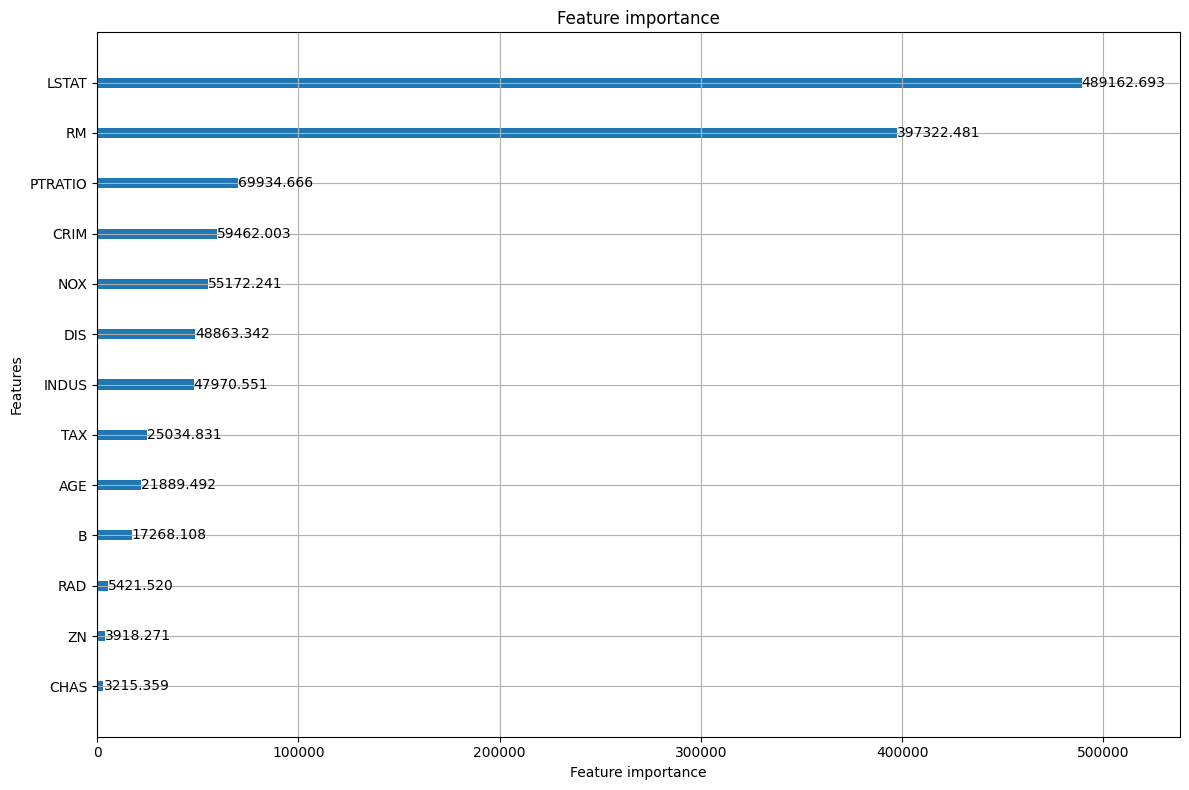

In [17]:
lgb.plot_importance(model, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [18]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

train_mae = mean_squared_error(train_y, train_pred)
test_mae = mean_squared_error(test_y, test_pred)
print(f'MSE train data: {train_mae:.3f}')
print(f'MSE test data: {test_mae:.3f}')

MSE train data: 0.489
MSE test data: 17.391


In [19]:
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y, test_pred)
print(f'R2 train data: {train_r2:.3f}')
print(f'R2 test data: {test_r2:.3f}')

R2 train data: 0.994
R2 test data: 0.791


参考ページ([ボストン市の住宅価格をScikit-learnの線形回帰で予測](https://techtech-sorae.com/%E3%83%9C%E3%82%B9%E3%83%88%E3%83%B3%E5%B8%82%E3%81%AE%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%82%92scikit-learn%E3%81%AE%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%A7%E4%BA%88%E6%B8%AC/))より高い精度が出た．